### 문제 정의

- 패션 데이터를 이용해서 다중분류
- 전이학습

데이터 수집

In [17]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [18]:
# 훈련데이터 1000개, 테스트 데이터 300개 샘플링
X_train = X_train[:1000, :] 
y_train = y_train[:1000] 
X_test = X_test[:300, :]
y_test = y_test[:300]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1000, 28, 28), (1000,), (300, 28, 28), (300,))

In [19]:
import pandas as pd

pd.Series(y_train).unique()

array([9, 0, 3, 2, 7, 5, 1, 6, 4, 8], dtype=uint8)

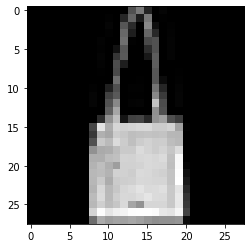

In [20]:
import matplotlib.pyplot as plt

plt.imshow(X_train[200], cmap="gray")

In [21]:
y_train_en = pd.get_dummies(y_train)
y_test_en = pd.get_dummies(y_test)

y_train_en.shape, y_test_en.shape

((1000, 10), (300, 10))

이미지 전처리

In [23]:
# 이미지를 (28, 28)에서 (244, 244) 크기로 변경
from PIL import Image
import numpy as np

train_resize_list = []

for i in range(len(X_train)) :
    train_resize_img = Image.fromarray(X_train[i]).resize((244, 244))
    train_resize_list.append(np.array(train_resize_img))

test_resize_list = []

for i in range(len(X_test)) :
    test_resize_img = Image.fromarray(X_test[i]).resize((244, 244))
    test_resize_list.append(np.array(test_resize_img))    

In [24]:
# 리스트를 numpy array
X_train_resized = np.array(train_resize_list)
X_test_resized = np.array(test_resize_list)

X_train_resized.shape, X_test_resized.shape

((1000, 244, 244), (300, 244, 244))

In [26]:
# 색상 차원 추가
X_train_resized = X_train_resized.reshape(X_train_resized.shape[0], 244, 244, 1)
X_test_resized = X_test_resized.reshape(X_test_resized.shape[0], 244, 244, 1)

X_train_resized.shape, X_test_resized.shape

((1000, 244, 244, 1), (300, 244, 244, 1))

학습

In [27]:
import numpy as np
import tensorflow as tf

seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

model1 = Sequential()

model1.add(Conv2D(32, (3,3), input_shape=(244, 244, 1),
                 activation="relu"))
model1.add(MaxPooling2D((2,2)))
model1.add(Conv2D(128, (3,3),activation="relu"))
model1.add(MaxPooling2D((2,2)))
model1.add(Conv2D(256, (3,3),activation="relu"))
model1.add(MaxPooling2D((2,2)))

model1.add(Flatten())

model1.add(Dropout(0.5))
model1.add(Dense(512, activation="relu"))
model1.add(Dense(10, activation="softmax"))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 242, 242, 32)      320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 121, 121, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 119, 119, 128)     36992     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 59, 59, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 57, 57, 256)       295168    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 28, 28, 256)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 200704)           

In [36]:
model1.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(lr=0.0001),
               metrics=["acc"])

In [37]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os

MODEL_DIR = "./model/"

if not os.path.exists(MODEL_DIR) :
    os.mkdir(MODEL_DIR)
    
filepath = MODEL_DIR + "fashion_{epoch:04d}_{val_acc:.3f}.hdf5"    

mc = ModelCheckpoint(filepath = filepath,
                     monitor="val_acc",
                     save_best_only = True)

es = EarlyStopping(monitor="val_acc", patience=20)

h1 = model1.fit(X_train_resized, y_train_en,
               epochs=100, batch_size=10,
               validation_data=(X_test_resized, y_test_en),
               callbacks=[mc, es])

Train on 1000 samples, validate on 300 samples
Epoch 1/100
1000/1000 [==============================] - 10s 10ms/sample - loss: 8.1938 - acc: 0.6600 - val_loss: 0.6320 - val_acc: 0.8033
Epoch 2/100
1000/1000 [==============================] - 4s 4ms/sample - loss: 0.3552 - acc: 0.8800 - val_loss: 0.5826 - val_acc: 0.8033
Epoch 3/100
1000/1000 [==============================] - 4s 4ms/sample - loss: 0.2210 - acc: 0.9270 - val_loss: 0.7099 - val_acc: 0.7933
Epoch 4/100
1000/1000 [==============================] - 9s 9ms/sample - loss: 0.1003 - acc: 0.9640 - val_loss: 0.6123 - val_acc: 0.8333
Epoch 5/100
1000/1000 [==============================] - 4s 4ms/sample - loss: 0.0704 - acc: 0.9760 - val_loss: 0.7068 - val_acc: 0.8333
Epoch 6/100
1000/1000 [==============================] - 4s 4ms/sample - loss: 0.0557 - acc: 0.9780 - val_loss: 0.7782 - val_acc: 0.8300
Epoch 7/100
1000/1000 [==============================] - 9s 9ms/sample - loss: 0.0537 - acc: 0.9790 - val_loss: 0.7626 - val_acc:

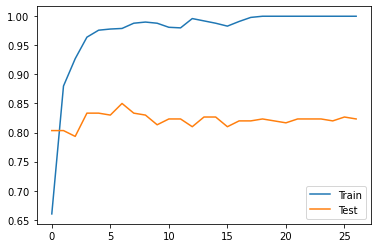

In [40]:
import matplotlib.pyplot as plt 

plt.plot(h1.history["acc"], label="Train")
plt.plot(h1.history["val_acc"], label="Test")
plt.legend()

In [46]:
pred = model1.predict(X_test_resized)

print(pred[0])
print(y_test[0])

[5.2419396e-14 1.7942373e-11 1.4258748e-13 5.0548758e-13 2.6150554e-11
 6.4588153e-09 1.9274330e-12 3.0652789e-04 5.2238476e-09 9.9969351e-01]
9


Xception을 이용한 전이학습

In [47]:
# 그레이 이미지 채널을 칼라이미지 채널 (B, G, R)로 변경 
X_train_resized = np.repeat(X_train_resized, 3, axis=3)
X_test_resized = np.repeat(X_test_resized, 3, axis=3)

X_train_resized.shape, X_test_resized.shape

((1000, 244, 244, 3), (300, 244, 244, 3))

In [61]:
from tensorflow.keras.applications import Xception

conv_xception = Xception(include_top = False,
                         weights="imagenet",
                         input_shape=(244, 244, 3))
# Xception 모델의 파라미터 갱신을 갱신하도록 함
conv_xception.trainable = True

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

model2 = Sequential()
model2.add(conv_xception)
model2.add(Flatten())

model2.add(Dropout(0.5))
model2.add(Dense(512, activation="relu"))
model2.add(Dense(10, activation="softmax"))

model2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 8, 8, 2048)        20861480  
_________________________________________________________________
flatten_4 (Flatten)          (None, 131072)            0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 131072)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               67109376  
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 87,975,986
Trainable params: 87,921,458
Non-trainable params: 54,528
_________________________________________________________________


In [63]:
model2.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(lr=0.0001),
               metrics=["acc"])

In [65]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os

MODEL_DIR = "./model/"

if not os.path.exists(MODEL_DIR) :
    os.mkdir(MODEL_DIR)
    
filepath = MODEL_DIR + "fashion2_{epoch:04d}_{val_acc:.3f}.hdf5"    

mc = ModelCheckpoint(filepath = filepath,
                     monitor="val_acc",
                     save_best_only = True)

es = EarlyStopping(monitor="val_acc", patience=3)

h2 = model2.fit(X_train_resized, y_train_en,
               epochs=10, batch_size=10,
               validation_data=(X_test_resized, y_test_en),
               callbacks=[mc, es])

Train on 1000 samples, validate on 300 samples
Epoch 1/10
1000/1000 [==============================] - 25s 25ms/sample - loss: 0.0492 - acc: 0.9880 - val_loss: 0.7685 - val_acc: 0.8633
Epoch 2/10
1000/1000 [==============================] - 25s 25ms/sample - loss: 0.0473 - acc: 0.9810 - val_loss: 0.6380 - val_acc: 0.8700
Epoch 3/10
1000/1000 [==============================] - 16s 16ms/sample - loss: 0.0718 - acc: 0.9800 - val_loss: 0.6919 - val_acc: 0.8533
Epoch 4/10
1000/1000 [==============================] - 16s 16ms/sample - loss: 0.0827 - acc: 0.9720 - val_loss: 0.7915 - val_acc: 0.8333
Epoch 5/10
1000/1000 [==============================] - 16s 16ms/sample - loss: 0.0826 - acc: 0.9860 - val_loss: 0.7460 - val_acc: 0.8267


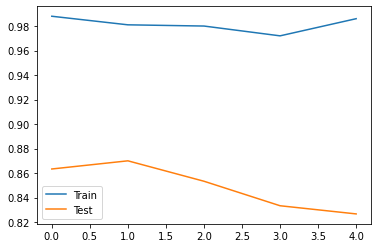

In [66]:
import matplotlib.pyplot as plt 

plt.plot(h2.history["acc"], label="Train")
plt.plot(h2.history["val_acc"], label="Test")
plt.legend()